In [16]:
import pandas as pd
from malnis import show
from nltk.tokenize import sent_tokenize
from tqdm.notebook import tqdm

In [9]:
data = pd.read_pickle("results.pkl").sort_values("r2", ascending = False)
show(data, 20)

(391, 6)


,query,document,summary,r1,r2,rl
36,"For many types of machine learning algorithms,...","field in computer science, and health informat...",[While the techniques for neural networks are ...,0.594595,0.485714,0.594595
38,We consider the problem of learning good traje...,"field in computer science, and health informat...",[[71] considered the problem of learning good ...,0.646766,0.478571,0.636816
136,We study in this work the importance of depth ...,Deep Learning Based Text Classification: A Com...,[[57] show that deep models indeed outperform ...,0.533333,0.403101,0.533333
5,We investigate a lattice-structured LSTM model...,1041-4347 (c) 2020 IEEE. Personal use is permi...,[Zhang and Yang [149] proposed a lattice-struc...,0.478261,0.393162,0.478261
316,"HDBSCAN*, a state-of-the-art density-based hie...",PVLDB Reference Format: Antonio Cavalcante Ara...,"[In [6], the authors proposed RNG-HDBSCAN*, a ...",0.539062,0.350365,0.507812
112,This work investigates continual learning of t...,Fully automatic deep learning has become the s...,[Baweja et al. (2018) investigate continual le...,0.480769,0.317690,0.442308
133,Word embeddings are effective intermediate rep...,Deep Learning Based Text Classification: A Com...,[[84] view TC as a label-word matching problem...,0.508671,0.299145,0.485549
257,Query relevance ranking and sentence saliency ...,Keywords: Query-focused summarization · Extrac...,[There exist approaches utilizing attention me...,0.500000,0.293333,0.490566
52,The key idea behind active learning is that a ...,I. INTRODUCTION Deep Neural Networks (DNNs) tr...,[The key idea behind active learning is that a...,0.368664,0.282828,0.368664
315,When AI systems interact with humans in the lo...,22 22 23 23 24 24 25 25 26 26 27 27 28 28 29 2...,[• Approaches: Past work on explanations prima...,0.330827,0.278075,0.330827


<AxesSubplot:ylabel='Frequency'>

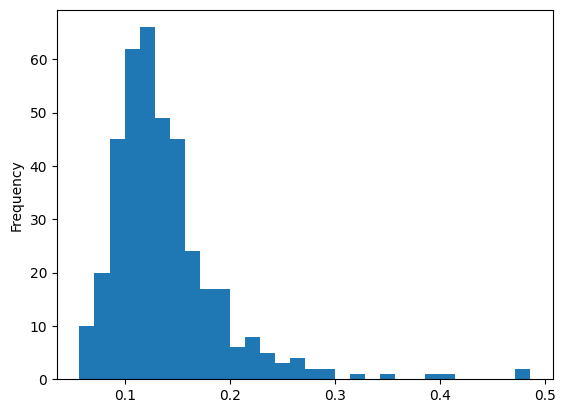

In [10]:
data.r2.plot.hist(bins = 30)

In [11]:
(data.r2 > 0.2).sum()

35

In [18]:
relevance = data\
.assign(sentences = lambda df: df.document.map(lambda x: sent_tokenize(x)))\
.assign(
    relevance = lambda df: df.apply(
        lambda r: [True if s in r["summary"] else False for s in r["sentences"]], 
        axis = "columns"
    )
)
show(relevance)

(391, 8)


,query,document,summary,r1,r2,rl,sentences,relevance
36,"For many types of machine learning algorithms,...","field in computer science, and health informat...",[While the techniques for neural networks are ...,0.594595,0.485714,0.594595,"[field in computer science, and health informa...","[False, False, False, False, False, False, Fal..."
38,We consider the problem of learning good traje...,"field in computer science, and health informat...",[[71] considered the problem of learning good ...,0.646766,0.478571,0.636816,"[field in computer science, and health informa...","[False, False, False, False, False, False, Fal..."
136,We study in this work the importance of depth ...,Deep Learning Based Text Classification: A Com...,[[57] show that deep models indeed outperform ...,0.533333,0.403101,0.533333,[Deep Learning Based Text Classification: A Co...,"[False, False, False, False, False, False, Fal..."
5,We investigate a lattice-structured LSTM model...,1041-4347 (c) 2020 IEEE. Personal use is permi...,[Zhang and Yang [149] proposed a lattice-struc...,0.478261,0.393162,0.478261,"[1041-4347 (c) 2020 IEEE., Personal use is per...","[False, False, False, False, False, False, Fal..."
316,"HDBSCAN*, a state-of-the-art density-based hie...",PVLDB Reference Format: Antonio Cavalcante Ara...,"[In [6], the authors proposed RNG-HDBSCAN*, a ...",0.539062,0.350365,0.507812,[PVLDB Reference Format: Antonio Cavalcante Ar...,"[False, False, False, False, False, False, Fal..."


In [19]:
all(relevance.sentences.map(len) == relevance.relevance.map(len))

True

In [20]:
pwd

'/home/jarobyte/malnis_dataset/scripts/build'

In [21]:
relevance.to_pickle("../../data/labels.pkl")